# Loan Default Prediction

**Project Overview**

Build a predictive model that assigns default probabilities to loan applications.
Minimize nancial risk by accurately predicting the likelihood of loan defaults, enabling
more informed and strategic lending decisions.

# Notebook Structure
---
<details>
<summary><b>1. Business Problem and Objectives</b></summary>
   Define the problem being addressed and its relevance to real-world scenarios.
</details>

---

<details>
<summary><b>2. Data Acquisition and Preparation</b></summary>

- ### **2.1 Data Source and Download**  
  Explanation of the dataset source and how it was obtained.  

- ### **2.2 Installing Required Modules**  
  List and install the libraries needed for the project.  

- ### **2.3 Importing Modules and Global Variables**  
  Set up imports and define constants or global variables.  

- ### **2.4 Defining Supplemental Functions**  
  Helper functions to streamline data processing.  

- ### **2.5 Data Loading**  
  Load the dataset into a DataFrame or suitable data structure.  

- ### **2.6 Basic Data Understanding**  
  Perform initial data exploration, including shape, columns, and types.  

</details>

---

<details>
<summary><b>3. Data Preprocessing and Feature Engineering</b></summary>

- ### **3.1 Cleaning**  

- ### **3.2 Preprocessing**  

- ### **3.3 Feature Extraction**  

</details>

---

<details>
<summary><b>4. Predictive Analysis</b></summary>

- ### **4.1 Train-Test Data Split**  
- ### **4.2 Classification with Simple Model**   
  Choose a simple base classification model and train it on the preprocessed data. Assess model performance using metrics like accuracy, precision, and recall.
- ### **4.3 Selecting Best Model for Feature Reduction**
  Deploy several advanced classification models with feature interpretability.
- ### **4.4 Feature Reduction Using Best Advanced Model**
  Reducing dataset to most important features from best performing model.        
- ### **4.5 Tuning Hyperparameters for Logistic Regression Model**
  Use parameter grid search to find the best-performing model.  
- ### **4.6 Improved Model Performance**
  Assess model performance using metrics like accuracy, precision, and recall.
- ### **4.7 Feature Interpretation**
  Visualize results and discuss findings, including strengths and limitations.
</details>

---

<details>
<summary><b>5. Conclusion</b></summary>
Summarize work.
Summarize findings, including strengths and limitations.
Suggest future work.
</details>


## 1.1 Business Problem and Objectives

**Problem Statement:**
**Key Questions:**
**Project Objectives:**


# 2. Data Acquisition and Preparation

## 2.1. Data Understanding

This section outlines the source of the data used in this project,  and provides instructions for downloading it.

**Data Sources**
**Data Relevance**
**Data Limitations**
**Download Instructions**
**Data Storage**
**Data Loading**

## 2.2 Installing Required Modules

This section focuses on installing the necessary Python libraries and packages required

1. **Requirements File**
    - We retrieve the list of required packages from a `requirements.txt` file hosted on GitHub using `wget`. This file contains the names and versions of all the dependencies.
    - This ensures that we install the correct versions of the libraries for compatibility and reproducibility.
2. **Installation using pip**
    - We use Python's `pip` package manager to install the libraries listed in the `requirements.txt` file.
    - The `-r` flag instructs `pip` to read the requirements file and install all the packages listed within.

Obtaining Data from the [Loan Default Prediction Competition](https://www.kaggle.com/competitions/home-credit-default-risk/overview) on **Kaggle:**

Before accessing the loan default prediction data, you must first join the competition and agree to its specific Terms & Conditions. Follow the step:

1. Create/Log In to Your Kaggle Account.
2. Navigate to the Competition Page. This page will have all the relevant details about the competition, including the rules and guidelines.
3. Click the “Join Competition” button. This action will prompt you to review and agree to the competition's Terms & Conditions. You must accept these terms before you can access the data.
4. Downloading the Dataset.
  
  a) **Manual Download**. After joining and agreeing to the terms, use the download button provided on the competition page to download the dataset directly to your computer.

  b) **Using the Kaggle API**. If you prefer using the command line, install the Kaggle API.

  `!pip install kaggle`

  Next, ensure your Kaggle API credentials (found in your account settings) are correctly set up (typically by placing the kaggle.json file in the ~/.kaggle/ directory). Then, run:

  `!kaggle competitions download -c home-credit-default-risk`

In [1]:
# Upload kaggle.json
from google.colab import files
files.upload()  # Upload your kaggle.json file here
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


This block of code will download the dataset into either `/content` if environment is `Colab`, or into local `Downloads` folder.

In [2]:
# Download the dataset !kaggle competitions download -c home-credit-default-risk
# A fancier way of doing the kaggle download with try-catch block, if notebook is executed locally
import subprocess

try:
    # Run the Kaggle dataset download command
    result = subprocess.run(
        ["kaggle", "competitions", "download", "-c", "home-credit-default-risk"],
        check=True,  # Raise an exception if the command fails
        text=True,   # Capture output as text
        capture_output=True  # Capture stdout and stderr
    )
    print("Dataset downloaded successfully!")
    print(result.stdout)  # Print the command output
except subprocess.CalledProcessError as e:
    print("Error occurred while downloading the dataset.")
    print(f"Return code: {e.returncode}")
    print(f"Error output: {e.stderr}")
except FileNotFoundError:
    print("Kaggle CLI is not installed. Please install it and ensure it's in your PATH.")

Dataset downloaded successfully!




This block of code contains supplemental functions that will extra ct and move datasets into defailt `data` directory.  

In [3]:
# Import modules
import os
import zipfile
import requests

# Function checks if directory exists
def ensure_directory(path):
    """
    Ensure that a directory exists. If not, create it.
    """
    os.makedirs(path, exist_ok=True)
    print(f"Directory ensured: {path}")

# Function downloads files
def download_files(base_url, file_names, destination_dir):
    """
    Download a list of files from a base URL to a specified directory.

    Args:
    - base_url (str): The base URL for the files.
    - file_names (list): List of filenames to download.
    - destination_dir (str): Directory to save the downloaded files.
    """
    for file_name in file_names:
        url = f"{base_url}/{file_name}"
        dest_path = os.path.join(destination_dir, file_name)
        if not os.path.exists(dest_path):
            print(f"Downloading {file_name}...")
            response = requests.get(url)
            response.raise_for_status()
            with open(dest_path, "wb") as f:
                f.write(response.content)
            print(f"Downloaded: {file_name}")
        else:
            print(f"File already exists: {file_name}")

# Function unzips archive into directory
def unzip_dataset(zip_path, destination_dir):
    """
    Unzip a dataset into the specified directory.

    Args:
    - zip_path (str): Path to the zip file.
    - destination_dir (str): Directory to extract the zip contents.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_dir)
    print(f"Unzipped: {zip_path} to {destination_dir}")

# Function to determine data directory, depending on runtime environment.

def determine_data_dir():
    """
    Determines the data directory based on the execution environment:
    - Local: Uses 'Data' directory in the current working directory.
    - Cloud (e.g., Google Colab): Uses '/content' as the data directory.

    Returns:
        str: Path to the appropriate data directory.
    """
    if 'COLAB_GPU' in os.environ:  # Check if running in Google Colab
        data_dir = "/content/data"
        print(f"Running in Google Colab. Using data directory: {data_dir}")
    else:
        data_dir = os.path.join(os.getcwd(), "data")
        print(f"Running locally. Using data directory: {data_dir}")

        # Ensure the 'data' directory exists locally
        if not os.path.isdir(data_dir):
            print(f"The directory '{data_dir}' does not exist. Please create it and place the data files there.")
            raise FileNotFoundError(f"'{data_dir}' directory is required for local execution.")

    return data_dir

This block of code syncs repository structure with colab or local version.

In [4]:
# Check data directories
data_dir = determine_data_dir()

# Get the parent directory of data_dir
base_dir = os.path.dirname(data_dir)
models_dir = os.path.join(base_dir, "models")
images_dir = os.path.join(base_dir, "images")

# Ensure directories exist
ensure_directory(data_dir)
ensure_directory(models_dir)
ensure_directory(images_dir)

# Dataset path
zip_file_path_dataset = os.path.join("home-credit-default-risk.zip")

# Check if the file exists
if os.path.exists(zip_file_path_dataset):
    print("File found. Proceeding to unzip...")
    # Unzip dataset
    unzip_dataset("home-credit-default-risk.zip", data_dir)
    # Remove after unzipping
    os.remove(zip_file_path_dataset)
    print(f"Removed ZIP file: {zip_file_path_dataset}")
else:
    print("File not found. Please check the path or download the Dataset from Kaggle.")

# Download supplemental data
github_base_url = "https://raw.githubusercontent.com/leksea/loan-default-prediction/main/data"
supplemental_files = [
]
download_files(github_base_url, supplemental_files, data_dir)

# Download model into models directory
model_base_url = "https://raw.githubusercontent.com/leksea/loan-default-prediction/main/models"
model_files = [
]
download_files(model_base_url, model_files, models_dir)
print("Setup complete.")

Running in Google Colab. Using data directory: /content/data
Directory ensured: /content/data
Directory ensured: /content/models
Directory ensured: /content/images
File found. Proceeding to unzip...
Unzipped: home-credit-default-risk.zip to /content/data
Removed ZIP file: home-credit-default-risk.zip
Setup complete.


# 2.3 Importing Modules and Global Variables

In [5]:
# All imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.4 Defining Supplemental Functions

In [6]:
# supplemental functions go here

# 2.5 Data Loading

In [7]:
## Loading the files
# determine the data directory
data_dir = determine_data_dir()

df_col_desc = pd.read_csv(os.path.join(data_dir, 'HomeCredit_columns_description.csv'), encoding='latin1')
df_application_train = pd.read_csv(os.path.join(data_dir, 'application_train.csv'), encoding='latin1')
df_application_test = pd.read_csv(os.path.join(data_dir, 'application_test.csv'), encoding='latin1')
df_bureau = pd.read_csv(os.path.join(data_dir, 'bureau.csv'), encoding='latin1')
df_bureau_balance = pd.read_csv(os.path.join(data_dir, 'bureau_balance.csv'), encoding='latin1')
df_credit_card_balance = pd.read_csv(os.path.join(data_dir, 'credit_card_balance.csv'), encoding='latin1')
df_installments_payments = pd.read_csv(os.path.join(data_dir, 'installments_payments.csv'), encoding='latin1')
df_POS_CASH_balance = pd.read_csv(os.path.join(data_dir, 'POS_CASH_balance.csv'), encoding='latin1')
df_previous_application = pd.read_csv(os.path.join(data_dir, 'previous_application.csv'), encoding='latin1')
df_application_test = pd.read_csv(os.path.join(data_dir, 'application_test.csv'), encoding='latin1')

Running in Google Colab. Using data directory: /content/data


# 2.6 Basic Data Understanding

Running built-in functions to gain insights about the data frames.
Start with printing the dataframe with column description, folllowed by calling `pandas` built-in methods `describe` and `info` on all loaded dataframes to get an idea about data distribution.

In [8]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# print full dataframe
df_col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [9]:
# print 10 random rows from all dataframes
df_bureau.sample(10, random_state=42)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1236926,305481,5916012,Closed,currency 1,-1531,0,-435.0,-846.0,NaN,0,450000.00,0.00,NaN,0.0,Credit card,-846,0.0
904815,288975,5667606,Closed,currency 1,-2263,0,-1166.0,-1165.0,NaN,0,169884.00,0.00,0.00,0.0,Consumer credit,-1164,NaN
849614,309911,6052617,Closed,currency 1,-932,0,911.0,-233.0,NaN,0,112500.00,0.00,NaN,0.0,Credit card,-228,NaN
16038,358247,6025723,Closed,currency 1,-800,0,-70.0,-636.0,NaN,0,140611.50,NaN,NaN,0.0,Consumer credit,-636,0.0
124732,452117,5242575,Closed,currency 1,-782,0,-417.0,-415.0,0.000,0,43960.50,0.00,0.00,0.0,Consumer credit,-415,NaN
1101941,100251,5777091,Closed,currency 1,-1734,0,-630.0,-920.0,13768.965,0,135000.00,-39.51,39.51,0.0,Credit card,-920,NaN
848833,416285,6051737,Closed,currency 1,-1463,0,1094.0,-672.0,NaN,0,675000.00,0.00,0.00,0.0,Consumer credit,-521,0.0
646158,284751,6150346,Closed,currency 1,-600,0,-423.0,-423.0,6999.570,0,43903.35,0.00,0.00,0.0,Consumer credit,-423,NaN
421603,433752,5742147,Active,currency 1,-788,0,524.0,NaN,NaN,0,135000.00,119322.00,0.00,0.0,Credit card,-101,NaN
165538,246369,6364518,Closed,currency 1,-556,0,-405.0,-427.0,NaN,0,19179.72,0.00,NaN,0.0,Consumer credit,-423,NaN


In [10]:
df_bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [11]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [12]:
df_bureau_balance.sample(10, random_state=42)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
10077170,6423524,-10,X
15189524,6059583,-20,0
6921920,6298033,-70,C
2380938,6562465,-2,0
21676529,5929260,-31,C
17077395,5514685,-22,C
12606922,5022798,-21,C
24611635,6647764,-4,C
15965686,5067718,-38,C
20810643,5401506,-73,C


In [13]:
df_bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [14]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [15]:
df_credit_card_balance.sample(10, random_state=42)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2515502,2229653,284348,-45,136399.635,135000,0.0,0.00,0.0,0.00,6750.000,0.00,0.000,126236.880,136399.635,136399.635,0.0,0,0.0,0.0,48.0,Active,1,1
1307940,1786293,156412,-77,0.000,90000,0.0,0.00,0.0,0.00,0.000,1275.84,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,5.0,Active,0,0
318549,2199394,397441,-88,0.000,180000,0.0,0.00,0.0,0.00,9000.000,115200.00,115200.000,0.000,0.000,0.000,0.0,0,0.0,0.0,1.0,Active,0,0
2558004,1171732,364620,-6,345647.430,337500,84600.0,84600.00,0.0,0.00,16579.215,16650.00,16650.000,312288.525,335103.930,335103.930,6.0,6,0.0,0.0,2.0,Active,0,0
3802735,1798989,361308,-69,93392.505,202500,0.0,0.00,0.0,0.00,10125.000,22500.00,22500.000,88767.720,93392.505,93392.505,0.0,0,0.0,0.0,18.0,Active,0,0
3627168,2226483,285606,-55,0.000,112500,0.0,0.00,0.0,0.00,67.500,652.50,86.445,0.000,0.000,0.000,0.0,0,0.0,0.0,45.0,Active,0,0
595909,2776410,188469,-13,0.000,45000,NaN,0.00,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
307514,2248451,407521,-94,91346.670,90000,4500.0,4500.00,0.0,0.00,4500.000,4500.00,4500.000,87259.095,91346.670,91346.670,1.0,1,0.0,0.0,3.0,Signed,0,0
2974906,1083061,159207,-8,22897.350,90000,45000.0,105373.35,0.0,60373.35,2985.525,45000.00,45000.000,21901.545,22897.350,22897.350,1.0,29,0.0,28.0,3.0,Active,0,0
2575153,1052719,109803,-48,77550.030,135000,0.0,0.00,0.0,0.00,9450.000,18000.00,8550.000,76149.135,77973.030,77973.030,0.0,0,0.0,0.0,1.0,Active,0,0


In [16]:
df_credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [17]:
df_credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [18]:
df_installments_payments.sample(10, random_state=42)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
5672587,2652367,232137,0.0,18,-2398.0,-2403.0,4500.000,4500.000
566432,1845882,167969,1.0,14,-136.0,-140.0,8043.480,8043.480
1780626,2430317,105881,1.0,15,-120.0,-120.0,48222.855,48222.855
2601634,1052426,170461,1.0,7,-1083.0,-1090.0,11721.735,11721.735
4353865,2148550,265570,0.0,47,-1125.0,-1128.0,7875.000,7875.000
10557626,1576797,351755,1.0,10,-702.0,-700.0,9994.455,8850.600
11330874,1956223,315408,1.0,10,-2267.0,-2263.0,12371.805,12356.550
5765003,1396186,244627,1.0,3,-752.0,-755.0,14588.910,14588.910
6769453,2426282,296187,1.0,10,-1253.0,-1256.0,2498.940,2498.940
13578050,1017530,420419,0.0,8,-140.0,-140.0,855.585,855.585


In [19]:
df_installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [20]:
df_installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [21]:
df_POS_CASH_balance.sample(10, random_state=42)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
6385902,1141316,278001,-37,12.0,0.0,Completed,0,0
389847,2682740,248899,-67,12.0,4.0,Active,0,0
7302029,2136647,209965,-73,18.0,18.0,Active,0,0
6010681,1678541,432875,-8,24.0,16.0,Active,0,0
2031441,1870173,117636,-86,10.0,7.0,Active,0,0
2774140,1051061,380942,-4,36.0,32.0,Active,0,0
5655609,2405023,377666,-16,12.0,7.0,Active,0,0
464999,2174435,205035,-23,36.0,35.0,Active,0,0
1866748,1709974,173223,-27,12.0,12.0,Active,0,0
5763961,1790808,177150,-4,11.0,0.0,Completed,0,0


In [22]:
df_POS_CASH_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [23]:
df_POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [24]:
df_previous_application.sample(10, random_state=42)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
876718,1327604,127360,Consumer loans,5318.100,27616.5,26082.0,2763.0,27616.5,WEDNESDAY,10,Y,1,0.104322,NaN,NaN,XAP,Approved,-1210,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,384,Consumer electronics,6.0,high,POS household with interest,365243.0,-1174.0,-1024.0,-1024.0,-1017.0,0.0
1463966,1830718,218834,Cash loans,19737.945,135000.0,165226.5,NaN,135000.0,WEDNESDAY,8,Y,1,NaN,NaN,NaN,XNA,Approved,-1223,XNA,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,0,XNA,12.0,high,Cash Street: high,365243.0,-1193.0,-863.0,-863.0,-855.0,1.0
354631,1258084,104079,Consumer loans,3304.710,36184.5,32562.0,3622.5,36184.5,FRIDAY,11,Y,1,0.109031,NaN,NaN,XAP,Approved,-606,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,30,Connectivity,12.0,middle,POS mobile with interest,365243.0,-574.0,-244.0,-574.0,-569.0,0.0
408441,2257201,389250,Consumer loans,10912.545,240948.0,240948.0,0.0,240948.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-755,Cash through the bank,XAP,Unaccompanied,Refreshed,Audio/Video,POS,XNA,Country-wide,4000,Consumer electronics,24.0,low_action,POS household without interest,365243.0,-724.0,-34.0,-34.0,-26.0,0.0
37031,1038283,385546,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,13,Y,1,NaN,NaN,NaN,XNA,Canceled,-301,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1661444,2463161,191453,Cash loans,23986.890,373500.0,408010.5,NaN,373500.0,MONDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-541,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-511.0,179.0,365243.0,365243.0,1.0
1205033,1852429,234120,Cash loans,23965.830,225000.0,239850.0,NaN,225000.0,WEDNESDAY,15,Y,1,NaN,NaN,NaN,XNA,Approved,-1457,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-1427.0,-1097.0,-1097.0,-1089.0,1.0
756582,1870639,250203,Cash loans,56076.705,450000.0,532516.5,NaN,450000.0,MONDAY,13,Y,1,NaN,NaN,NaN,XNA,Approved,-1228,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-1198.0,-868.0,-958.0,-956.0,1.0
1065283,1479977,448956,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,13,Y,1,NaN,NaN,NaN,XNA,Canceled,-412,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1386175,2644815,376118,Consumer loans,12146.265,116955.0,93555.0,23400.0,116955.0,SUNDAY,18,Y,1,0.217902,NaN,NaN,XAP,Approved,-324,Cash through the bank,XAP,NaN,Repeater,Computers,POS,XNA,Country-wide,25,Connectivity,10.0,high,POS mobile with interest,365243.0,-290.0,-20.0,-20.0,-16.0,0.0


In [25]:
df_previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [26]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [27]:
df_application_test.sample(10, random_state=42)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15071,208550,Cash loans,M,Y,Y,2,450000.0,854896.5,36351.0,702000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.032561,-11348,-1149,-5443.0,-3953,14.0,1,1,0,1,0,0,Managers,4.0,1,1,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.637061,0.771890,NaN,0.0926,0.0568,0.9732,0.6328,0.0115,0.072,0.1379,0.1333,0.1750,0.0379,0.0751,0.0898,0.0015,0.0081,0.0378,0.0413,0.9727,0.6406,0.0026,0.0000,0.1034,0.0833,0.1250,0.0152,0.0331,0.0192,0.0000,0.0000,0.0375,0.0621,0.9727,0.6310,0.0039,0.00,0.1034,0.0833,0.1250,0.0332,0.0308,0.0298,0.0000,0.0015,reg oper account,block of flats,0.0231,"Stone, brick",No,0.0,0.0,0.0,0.0,-730.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10157,173779,Cash loans,F,N,Y,0,67500.0,296280.0,19062.0,225000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.009175,-19852,365243,-192.0,-3237,NaN,1,0,0,1,0,0,NaN,1.0,2,2,FRIDAY,14,0,0,0,0,0,0,XNA,NaN,0.672038,0.554947,0.2320,0.1576,0.9990,0.9864,0.0803,0.200,0.1724,0.3333,0.3750,0.0291,0.1891,0.2099,0.8687,0.0000,0.2363,0.1635,0.9990,0.9869,0.0810,0.2014,0.1724,0.3333,0.3750,0.0297,0.2066,0.2186,0.8755,0.0000,0.2342,0.1576,0.9990,0.9866,0.0808,0.20,0.1724,0.3333,0.3750,0.0296,0.1924,0.2136,0.8734,0.0000,reg oper spec account,block of flats,0.2187,"Stone, brick",No,0.0,0.0,0.0,0.0,-693.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
36313,365820,Cash loans,F,Y,N,0,135000.0,339948.0,35694.0,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-15138,-4891,-9273.0,-4450,7.0,1,1,0,1,1,0,Private service staff,2.0,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.789471,0.630215,0.619528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [28]:
df_application_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,

In [29]:
df_application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [30]:
df_application_train.sample(10, random_state=42)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98194,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,0.4167,0.2917,0.0735,0.0601,0.0844,0.0058,0.1118,0.0756,0.0566,0.9940,0.9216,0.0523,0.0806,0.0345,0.3333,0.0417,0.0445,0.0652,0.0857,0.0,0.0000,0.0760,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
36463,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0

In [31]:
df_application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [32]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Home Credit Default Risk Dataset Summary

Below is a brief summary of the primary datasets provided in the Home Credit Default Risk competition, including approximate row and column counts along with a short description for each:

- **application_train.csv**  
  - **Size:** ~307,511 rows × 122 columns  
  - **Description:** Main training dataset containing detailed applicant information (demographics, financial data, etc.) along with the target variable (`TARGET`), which indicates whether a client defaulted on a loan.

- **application_test.csv**  
  - **Size:** ~48,744 rows × 121 columns  
  - **Description:** Test dataset with the same features as the training set (except for the target variable), used for evaluating model performance.

- **bureau.csv**  
  - **Size:** ~1,716,428 rows × 17 columns  
  - **Description:** Contains credit history data from external credit bureaus for previous and current loans. Features include statuses like active or closed credits, duration of credit, etc.

- **bureau_balance.csv**  
  - **Size:** ~27,299,925 rows × 3 columns  
  - **Description:** Provides monthly snapshots of each bureau record’s status, offering additional temporal context to the credit bureau data.

- **previous_application.csv**  
  - **Size:** ~1,670,214 rows × 37 columns  
  - **Description:** Details on past loan applications (both approved and refused), which can help capture historical credit behavior.

- **POS_CASH_balance.csv**  
  - **Size:** ~10,001,358 rows × 8 columns  
  - **Description:** Contains historical records for previous point-of-sale and cash loan applications, including payment statuses and other transactional data.

- **credit_card_balance.csv**  
  - **Size:** ~3,840,312 rows × 23 columns  
  - **Description:** Provides monthly information on credit card loan balances, offering insights into clients’ revolving credit behavior.

- **installments_payments.csv**  
  - **Size:** ~13,605,401 rows × 8 columns  
  - **Description:** Records details of individual installment payments for previous loans, such as payment amounts and delays, which can be useful for understanding repayment behavior.





### Initial Approach

The two main datasets `application_train`, `aplication_test` will be used for ML, they'll need basic cleaning and EDA to establish the outliers.

The remaining datasets can be used for feature engineering.

### Proposed Approach to EDA

Load, run EDA for each dataframe, save the clean version.

Visualizing the relations between the dataframes:

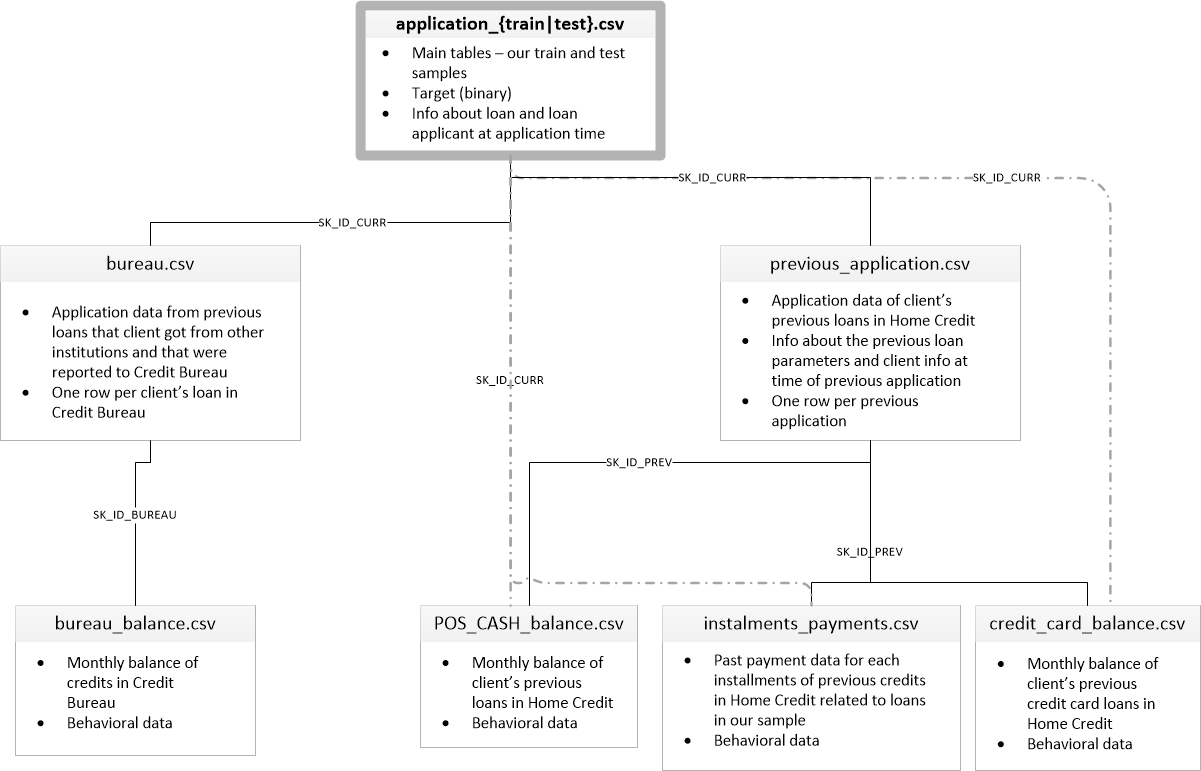

## 3. Data Preprocessing and Feature Engineering

### Data Preprocessing and Feature Engineering `buerau.csv`, `buerau_balance.csv`

Brief description of dataframes (from Kaggle):

`buerau.csv`
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

`buerau_balance.csv`
Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.


Missing Values in bureau.csv:
AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_DAY_OVERDUE        0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
dtype: float64


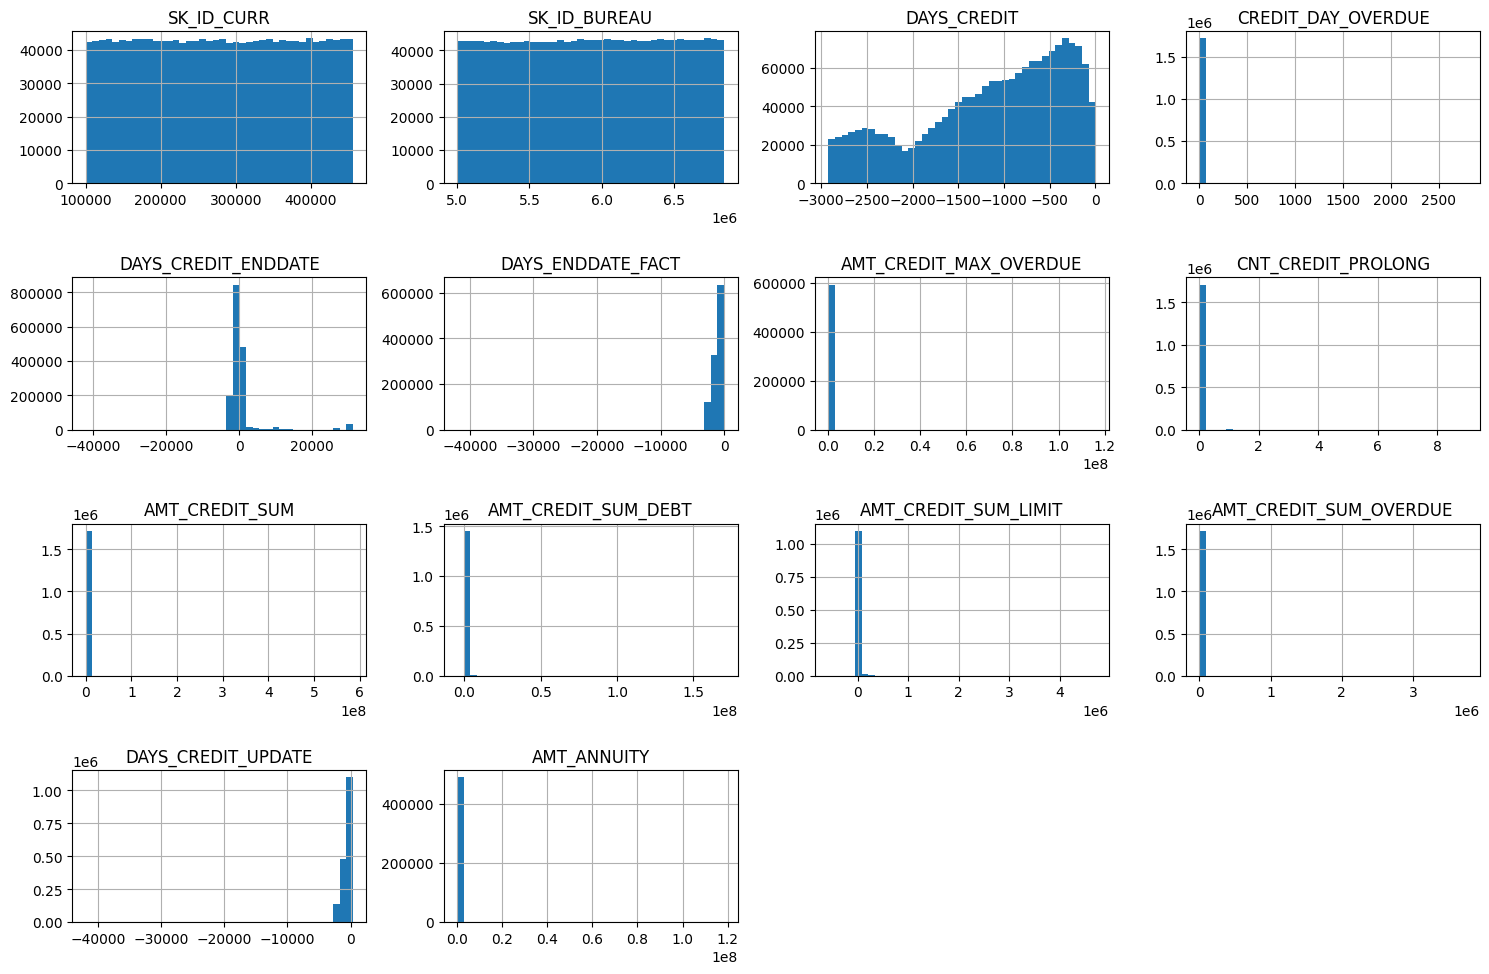

Unique values in categorical columns:

Value counts for CREDIT_ACTIVE:
CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64


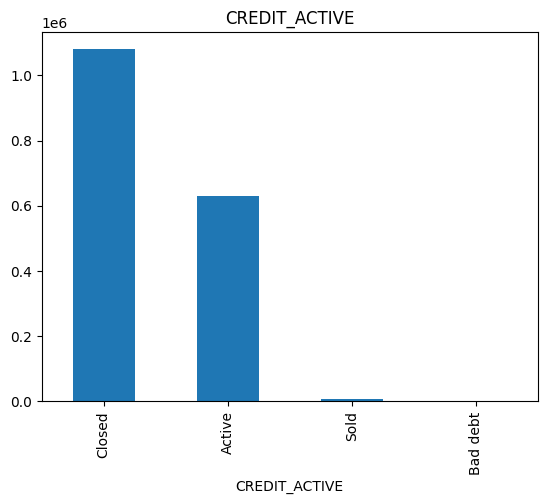


Value counts for CREDIT_CURRENCY:
CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64


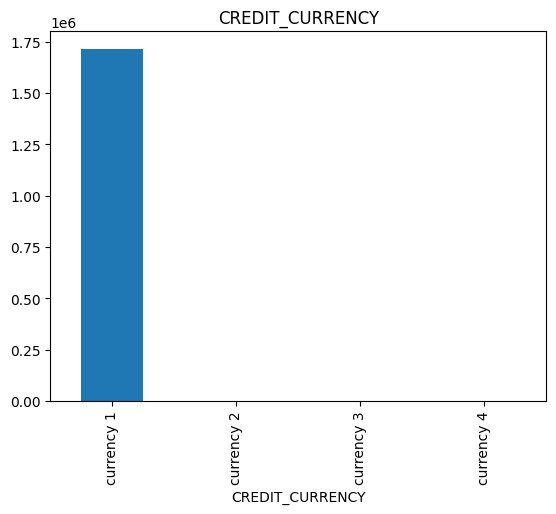


Value counts for CREDIT_TYPE:
CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64


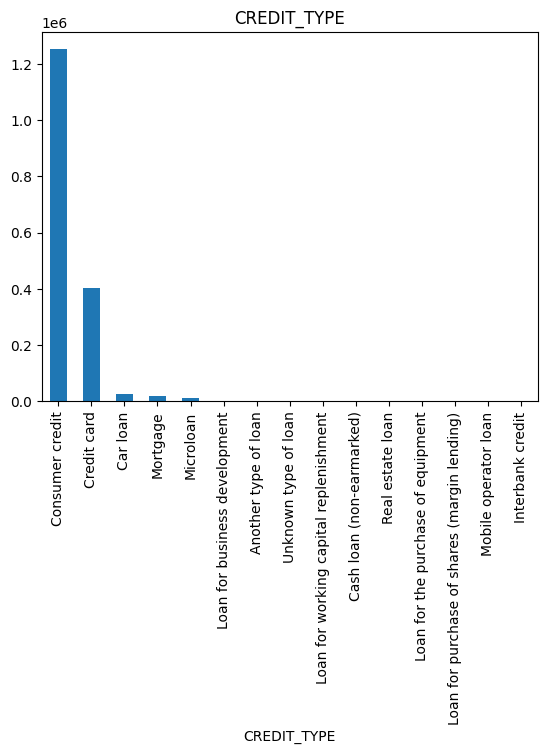

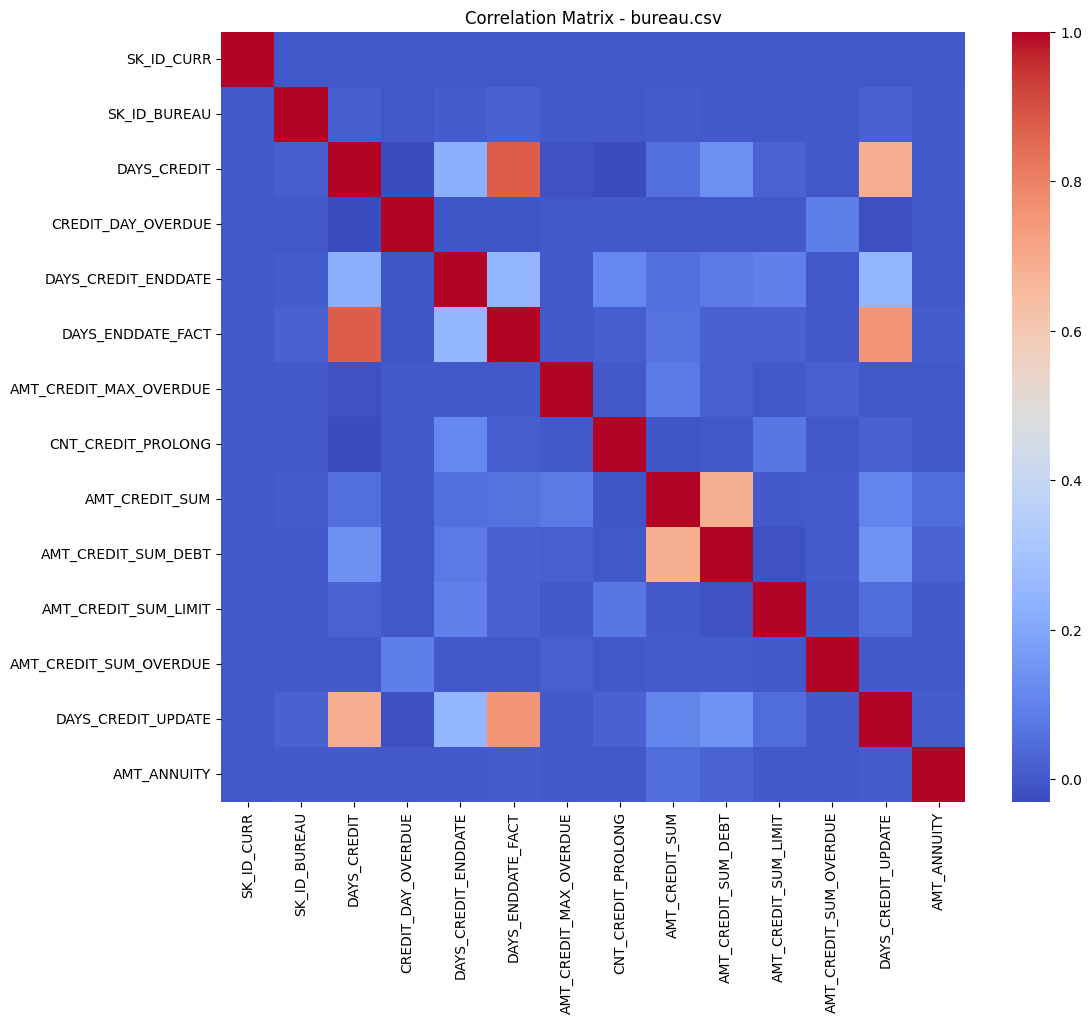

In [33]:
# ===========================
# EDA for `bureau.csv`
# ===========================
# Missing values
missing_bureau = df_bureau.isnull().mean().sort_values(ascending=False)
print("Missing Values in bureau.csv:")
print(missing_bureau)

# Numerical distributions
numerical_cols_bureau = df_bureau.select_dtypes(include='number').columns
df_bureau[numerical_cols_bureau].hist(bins=40, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Categorical columns
categorical_cols_bureau = df_bureau.columns.difference(numerical_cols_bureau)
print("Unique values in categorical columns:")
for col in categorical_cols_bureau:
    print(f"\nValue counts for {col}:")
    print(df_bureau[col].value_counts())
    df_bureau[col].value_counts().plot(kind='bar', title=col)
    plt.show()


# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_bureau[numerical_cols_bureau].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix - bureau.csv")
plt.show()

### Cleaning data in `bureau.csv`


In [34]:
# Consolidate similar types of loans

credit_type_mapping = {
    'Consumer credit': 'Consumer',
    'Credit card': 'Credit card',
    'Car loan': 'Vehicle',
    'Mortgage': 'Mortgage',
    'Microloan': 'Small loan',
    'Loan for business development': 'Business',
    'Loan for working capital replenishment': 'Business',
    'Loan for the purchase of equipment': 'Business',
    'Loan for purchase of shares (margin lending)': 'Investment',
    'Cash loan (non-earmarked)': 'Consumer',
    'Another type of loan': 'Other',
    'Unknown type of loan': 'Other',
    'Real estate loan': 'Mortgage',
    'Mobile operator loan': 'Other',
    'Interbank credit': 'Other',
}

df_bureau['CREDIT_TYPE_GROUPED'] = df_bureau['CREDIT_TYPE'].map(credit_type_mapping).fillna('Other')

Missing Values in bureau_balance.csv:
SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64
Unique SK_ID_BUREAU in bureau_balance: 817395
Value counts for STATUS:
STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64


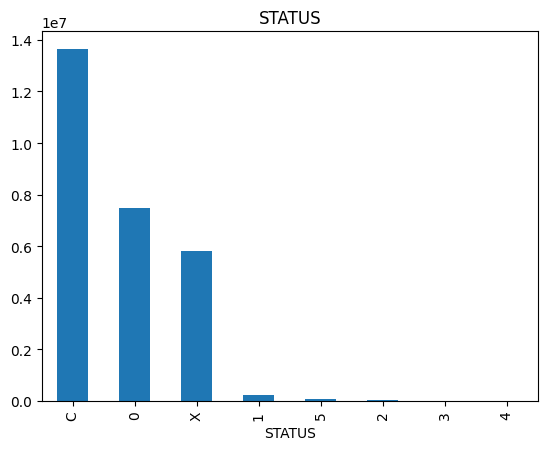

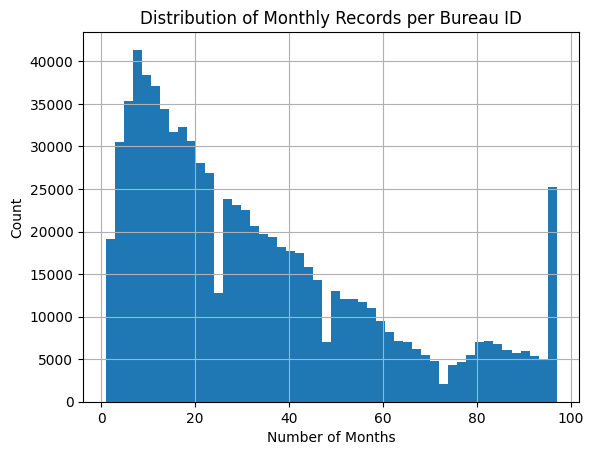

In [35]:
# ===========================
# EDA for `bureau_balance.csv`
# ===========================

# Missing values
missing_bureau_balance = df_bureau_balance.isnull().mean().sort_values(ascending=False)
print("Missing Values in bureau_balance.csv:")
print(missing_bureau_balance)

# Unique counts
print("Unique SK_ID_BUREAU in bureau_balance:", df_bureau_balance['SK_ID_BUREAU'].nunique())
print("Value counts for STATUS:")
print(df_bureau_balance['STATUS'].value_counts())
df_bureau_balance['STATUS'].value_counts().plot(kind='bar', title='STATUS')
plt.show()

# Monthly history lengths
history_lengths = df_bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].count()
history_lengths.hist(bins=50)
plt.title("Distribution of Monthly Records per Bureau ID")
plt.xlabel("Number of Months")
plt.ylabel("Count")
plt.show()

### Feature Engineering for `bureau_balance.csv`

Adding columns:

`MONTHS_ACTIVE` -- Age of credit account.
`LATEST_STATUS` -- Most recent account status.
`NUM_LATE_MONTHS` -- Count of late payments.
`LAST_LATE_MONTH` -- Last month of delinquency.
`STATUS_RATIO` -- Status distribution ratios.

In [40]:
# ===========================
# Feature Engineering for bureau_balance.csv
# ===========================

# Number of months in credit history
months_active = df_bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].nunique().rename('MONTHS_ACTIVE')

# Most recent status (month 0)
recent_status = df_bureau_balance[df_bureau_balance['MONTHS_BALANCE'] == 0][['SK_ID_BUREAU', 'STATUS']]
recent_status = recent_status.rename(columns={'STATUS': 'LATEST_STATUS'})

# Count of late payments (STATUS in '1'-'5')
delinquent = df_bureau_balance[df_bureau_balance['STATUS'].isin(['1','2','3','4','5'])]
delinquent_counts = delinquent.groupby('SK_ID_BUREAU')['STATUS'].count().rename('NUM_LATE_MONTHS')

# Last month of delinquency
last_late_month = delinquent.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max().rename('LAST_LATE_MONTH')

# Status distribution ratios
status_counts = df_bureau_balance.pivot_table(index='SK_ID_BUREAU', columns='STATUS', aggfunc='size', fill_value=0)
status_counts['TOTAL'] = status_counts.sum(axis=1)
status_normalized = status_counts.div(status_counts['TOTAL'], axis=0).add_prefix('STATUS RATIO')

# Combine all features
df_bureau_balance_features = months_active.to_frame()
df_bureau_balance_features = df_bureau_balance_features.join(recent_status.set_index('SK_ID_BUREAU'), how='left')
df_bureau_balance_features = df_bureau_balance_features.join(delinquent_counts, how='left')
df_bureau_balance_features = df_bureau_balance_features.join(last_late_month, how='left')
df_bureau_balance_features = df_bureau_balance_features.join(status_normalized, how='left')


# If a bureau account has only on-time or closed months, delinquent_counts will not include that and left-joint will
# fill corresponding SK_ID_BUREAU values with NaN. It's safe to impute them with 0.

df_bureau_balance_features['NUM_LATE_MONTHS'] = df_bureau_balance_features['NUM_LATE_MONTHS'].fillna(0)
df_bureau_balance_features['LAST_LATE_MONTH'] = df_bureau_balance_features['LAST_LATE_MONTH'].fillna(0)

In [41]:
df_bureau_balance_features.head()

,MONTHS_ACTIVE,LATEST_STATUS,NUM_LATE_MONTHS,LAST_LATE_MONTH,STATUS RATIO0,STATUS RATIO1,STATUS RATIO2,STATUS RATIO3,STATUS RATIO4,STATUS RATIO5,STATUS RATIOC,STATUS RATIOX,STATUS RATIOTOTAL
SK_ID_BUREAU,,,,,,,,,,,,,
5001709,97,C,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,1.0
5001710,83,C,0.0,0.0,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,1.0
5001711,4,X,0.0,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,1.0
5001712,19,C,0.0,0.0,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,1.0
5001713,22,X,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0
